## Libraries

In [75]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error ,mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Step 2 | Load the Datase</p>



In [76]:
# load the data from csv file locally in our PC

df = pd.read_csv('heart_disease_uci.csv')
df = df.drop(columns=['id', 'dataset'])

# Save the preprocessed dataset
df.to_csv('preprocessed_heart_disease_dataset.csv', index=False)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



# <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;"> Step 3 | Exploratory Data Analysis (EDA)</p>


### Exploring the each column of the dataset


In [77]:
# Explore each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [78]:
# Checking data shape

df.shape

(920, 14)


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.2 | Age Column</p>



In [79]:
# Age column
df['age'].min(), df['age'].max()

(28, 77)

In [80]:
# let's summarie the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Mean: 53.51086956521739
Median: 54.0
Mode: 54


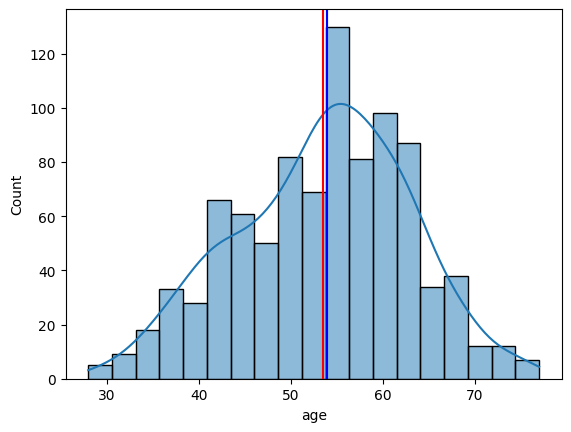

In [81]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

>* The minimum age to have a heart disease starts from `28` years old and maximum `77` year old.
>* The average of age in the people is `53.51%`  



## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.3 | Sex Column</p>


Let's explore the gender based distribution of the dataset for age column.


In [82]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(df, x='age', color='sex', title='Age distribution')
fig.show()

In [83]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [84]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


>* Males are(`726`) and percentage in the data is: ***`78.91%`***

>* Females are(`194`)Percentage in the data is: ***`21.09%`***


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.5 | CP Column</p>


#### Let's explore cp (Chest Pain) column:


In [85]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [86]:
# count plot of cp column by sex column
fig = px.histogram(df, x='cp', color='sex', barmode='group')
fig.show()

>* There `36` males and and `10` females who have  `Typical Angina` pain
>* There `426` males and and `70` females who have  `asymptomatic` pain
>* There `150` males and and `53` females who have  `non-anginal` pain
>* There `113` males and and `61` females who have  `atypical Angina` pain.

In [87]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

>* ***`typical angina`*** is maximum in the age `62-63` and in age`35.5-37.5` and `69.5-73.5` have no pain
>* ***`asymptomatic`*** is maximum in the age `56-57` and minimum in `30-31`
>* ***`non-anginal`*** is maximum in the age `54-55` and minimum 34-35
>* ***`atypical angina`*** is maximum in the age `54-55` and in age `63.5-65.5`,`67.5-69.5`,`71.5-73.5` have no pain


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.6 | Trestbps Column</p>


#### Let'e explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.



In [88]:
# find the value counts of trestbps column
df['trestbps'].describe()


count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Percentage of missing values in trestbps column: 6.41%


<Axes: xlabel='trestbps', ylabel='Count'>

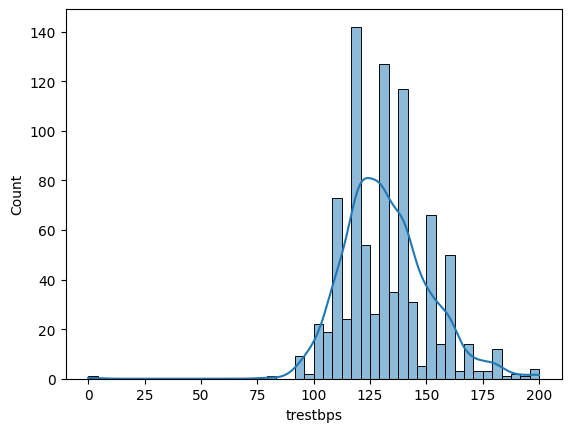

In [89]:
# Deal with missing values in trestbps column
# The Percentage of missing values in trestbps column
print(
    f"Percentage of missing values in trestbps column: {df['trestbps'].isna().sum() / df.shape[0] * 100:.2f}%")
sns.histplot(df['trestbps'], kde=True)

>* The minimum resting blood pressure is `94` and maximum is `200`
>* The average resting blood pressure is `132.4`
>* The resting blood pressure is `high` in `Cleveland` and `Hungary` and `low` in `Switzerland` and `VA Long Beach`



## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman;  color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.7 | Chol Column</p>


count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64


<Axes: xlabel='chol', ylabel='Count'>

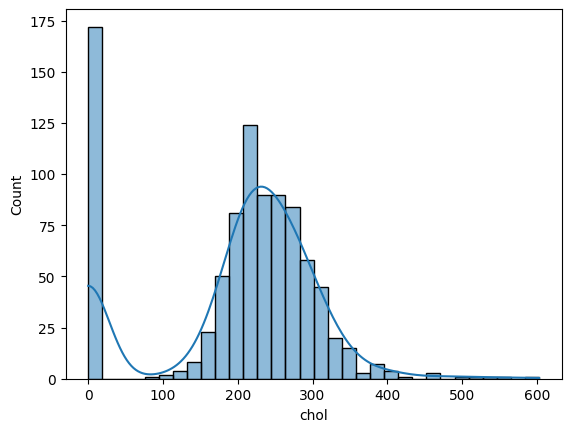

In [90]:
print(df['chol'].describe())

# create a histplot of chol column
sns.histplot(df['chol'], kde=True)

>* The average of Cholestrol is `199.130337%`
>* Minimum Cholestrol is `0`
>* Maximum Cholestrol is `603`

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.8 | Fbs Column</p>


>* Fasting blood sugar (`fbs`) is bool column

In [91]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [92]:
fig = px.histogram(df, x='fbs', color='sex', barmode='group')
fig.show()

>* There True values are `138` and False values `692`
>* There `164` Females have `False` values means no Fasting blood sugar and  `19` Females have `True` value have Fasting Blood sugar
>* There `528` Males have `False` values means no Fasting Blood Sugar and  `119` Males have `True` value have Fasting Blood Sugar

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.9 | Restecg Column</p>


In [93]:
# check unique values
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [94]:

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

`df['restecg'][df['restecg'] == 0] = "normal"` : This line of code updates the values in the 'restecg' column of the DataFrame df. It selects rows where the value in the 'restecg' column is equal to 0 and sets those values to 'normal'.

`df['restecg'][df['restecg'] == 1] = "ST-T wave abnormality"`: This line of code further updates the 'restecg' column. It selects rows where the value in the 'restecg' column is equal to 1 and sets those values to 'ST-T wave abnormality'.

`df['restecg'][df['restecg'] == 2] = "left ventricular hypertrophy"`: Similarly, this line updates the 'restecg' column. It selects rows where the value in the 'restecg' column is equal to 2 and sets those values to 'left ventricular hypertrophy'.

In [95]:
restecg_counts = df['restecg'].value_counts()
print(restecg_counts)

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [96]:

# remove row where are found Nan values
df.dropna(subset=['restecg'], inplace=True)

There found
> * `551` ***`normal`***
> * `188` ***`lv hypertrophy`***
> * `179` ***`st-t abnormality`***

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.10 | Thalch Column</p>


In [97]:
df['thalch'].describe()

count    863.000000
mean     137.528389
std       25.950226
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [98]:
# make scatter plot between thalch and age column
px.scatter (df,x='thalch',y='age')

In [99]:
#make plot between thalch and age column ploty
fig = px.scatter(df, x='age', y='thalch')
fig.show()

> * Minimum heart rate is `60` in `51` age
> * Maximum heart rate is `202` in `29` age
> * Average of heart rate is `137.528389%`

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.11 | Exang Column</p>


In [100]:
df['exang'].value_counts()

exang
False    526
True     337
Name: count, dtype: int64

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.12 | Oldpeak Column</p>


In [101]:
print(df['oldpeak'].describe())


count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


>* The minimum value of oldpeak is `0` mostly values are zero
>* Maximum value is `6.2`

>* oldpeack values cannnot be negative
>* convert negative to positive values

In [102]:
# Check for negative values
negative_values = df[df['oldpeak'] < 0]

# Count of negative values
count_negative_values = len(negative_values)
print(f"Count of negative values: {count_negative_values}")

# Convert negative values to positive
df['oldpeak'] = df['oldpeak'].abs()

# Now, print the negative values after converting to positive
negative_values_after_conversion = df[df['oldpeak'] < 0]
count_negative_values_after_conversion = len(negative_values_after_conversion)

print(f"\nCount of negative values after conversion: {count_negative_values_after_conversion}")

Count of negative values: 12

Count of negative values after conversion: 0


>* Here `12` negative values convert in to positive

In [103]:
# scatter plot between oldpeak and age
px.scatter (df,x='oldpeak',y='age')

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.13 | Slope Column</p>


In [104]:
# value count of slope
df['slope'].value_counts()

slope
flat           345
upsloping      202
downsloping     63
Name: count, dtype: int64

In [105]:

# Create a histrogram based on 'slope ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='slope', color='sex', barmode='group')
fig.show()

>* ***`Downsloping`*** count in ***`Male`*** is `56` is more and in ***`Female`*** is `7`
>* ***`Flat`*** count in ***`Male`*** is `276` is more and in ***`Female`*** is `69`
>* ***`Upsloping`*** count in ***`Male`*** is `145` is more and in ***`Female`*** is `57`

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.14 | Ca Column</p>


In [106]:
df['ca'].describe()

count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

>* Minimum value is `0.0`
>* Maximum value is `3.0`
>* The average is `0.676375%`

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;"> 4.15 | Thal Column</p>




In [107]:
df['thal'].value_counts()


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [108]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thal', color='sex', barmode='group')
fig.show()

>* The  male have ***`fixed defect`*** are `42` and female are `4`
>* The  male have ***`normal`*** are `110` and female are `86`
>* The  male have ***`reversable defect`*** are `171` and female are `21`


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">4.16 | Num Column</p>


> The  `num` is a target column which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [109]:
# unique values in num
print(df['num'].unique())
# check value count
print(df['num'].value_counts())

[0 2 1 3 4]
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


>* `0` have `411` number
>* `1` have `263` number
>* `2` have `109` number
>* `3` have `107` number
>* `4` have `28` number



# <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Step 5 |Missing Values </p>


In [110]:
# check null values
null_values=df.isnull().sum().sort_values(ascending=False)
print("null_values:\n",null_values)

null_values:
 ca          609
thal        484
slope       308
fbs          89
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
age           0
sex           0
cp            0
restecg       0
num           0
dtype: int64


<Axes: >

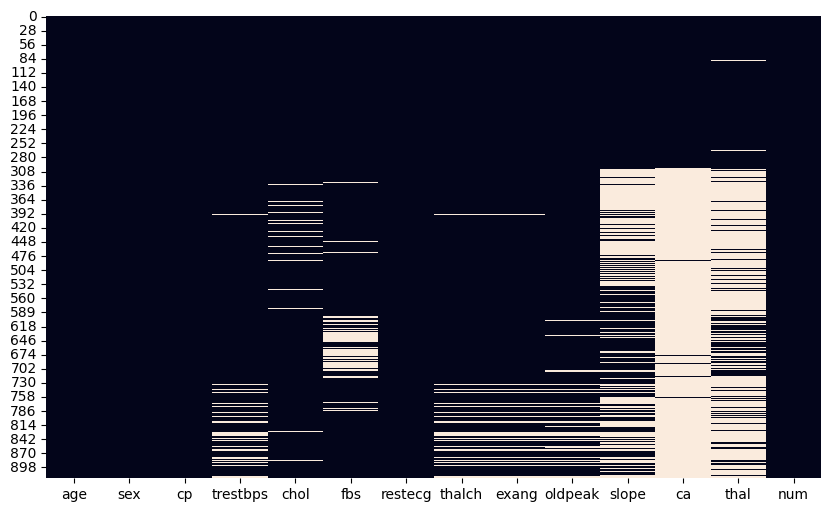

In [111]:
# Assuming df is your DataFrame
plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">5.2 | Percentage of Null Values</p>


In [112]:
# calculate the percentage of null values in each column
null_percentage = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

# round the percentage to 2 decimal places
null_percentage = null_percentage.round(2)

# print the percentage of null values
print("Percentage of null values:\n", null_percentage)

Percentage of null values:
 ca          66.34
thal        52.72
slope       33.55
fbs          9.69
oldpeak      6.75
trestbps     6.43
thalch       5.99
exang        5.99
chol         3.27
age          0.00
sex          0.00
cp           0.00
restecg      0.00
num          0.00
dtype: float64


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">5.3 | Columns of Missing Values</p>



In [113]:
# print missing data columns
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print("missing_data_cols",missing_data_cols)
print("----------------------------------------------")
#  print  numerical columns who have missing values
numerical_columns = df.select_dtypes(include='number').columns
missing_numerical_columns = df[numerical_columns].isnull().sum()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns > 0]
print("Numerical columns with missing values:")
for column in missing_numerical_columns.index:
    print(column)
print("----------------------------------------------")
# Print categorical columns who have missing values
categorical_columns = df.select_dtypes(include='object').columns
missing_categorical_columns = df[categorical_columns].isnull().sum()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns > 0]
print("Categorical columns with missing values:")
for column in missing_categorical_columns.index:
    print(column)


missing_data_cols ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
----------------------------------------------
Numerical columns with missing values:
trestbps
chol
thalch
oldpeak
ca
----------------------------------------------
Categorical columns with missing values:
fbs
exang
slope
thal


>* Here `10` culumns haven null values `trestbps , chol , fbs , restecg , thalch , exang , oldpeak , slope , ca , thal`
>* ***Categorical columns with missing values :*** `fbs , restecg , exang , slope , thal `
>* ***Numerical columns with missing values :*** `trestbps , chol , thalch , oldpeak , ca`
>* ***`ca`*** column having high `611` null values with percentage ***`66.41 %`***
>* ***`restecg`*** column having low  2 null values with percentage ***`0.22`***

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">5.4 | Impute Missing Values with Machine Learning</p>



In [114]:
# step1
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [115]:
# find only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()


# find only numerical columns
numerical_cols = df.select_dtypes(
    include=['int64', 'float64']).columns.tolist()


print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [116]:
# Separate the missing data columns into categorical and numeric columns
categorical_cols = ['thal', 'ca', 'slope',
                    'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

Function to Impute all missing values

In [117]:


# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [
        col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(
        estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(
                col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '" + passed_col + "' has been imputed with",
          round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(
                col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]


def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [
        col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(
        estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(
                col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(
                col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

### Missing Values Imputation Function using ML Models


>* `By this function impute all type missing values`

In [118]:


warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(
        round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.43%
MAE = 12.782151162790695 

RMSE = 17.137171298562638 

R2 = 0.05637644804112185 

Missing Values chol : 3.27%
MAE = 62.792415730337076 

RMSE = 83.57070813308434 

R2 = 0.37900583924789966 

Missing Values fbs : 9.69%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values thalch : 5.99%
MAE = 17.38184971098266 

RMSE = 22.13150214701291 

R2 = 0.29385447000569065 

Missing Values exang : 5.99%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.75%
MAE = 0.5341744186046512 

RMSE = 0.7738837497580208 

R2 = 0.41854350915664607 

Missing Values slope : 33.55%


The feature 'slope' has been imputed with 72.95 accuracy

Missing Values ca : 66.34%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.72%
The feature 'thal' has been imputed with 74.71 accuracy



In [119]:
# Impute the missing values in trestbps column with using IterativeImputer
# create an object of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on the trestbps column
imputer.fit(df[['trestbps']])
# transform the trestbps column
df['trestbps'] = imputer.transform(df[['trestbps']])

# check the missing values in trestbps column
print(f"Missing Vlaues in Trestbps column: {df['trestbps'].isna().sum()}")

Missing Vlaues in Trestbps column: 0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  ca        918 non-null    float64
 12  thal      918 non-null    object 
 13  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.6+ KB


In [121]:
# impute missing values using iterative imputer for ca, oldpeak, thalch , chol columns
# create an object of iterative imputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# fit_transform the imputer on ca, oldpeak, thal , chol columns
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])


#### Impute the missing value in thal column by using ML models


In [122]:
print(f"Missing Values in ca column: {df['thal'].isna().sum()}")

Missing Values in ca column: 0


In [123]:
df['thal'].value_counts()

thal
reversable defect    476
normal               389
fixed defect          53
Name: count, dtype: int64

In [124]:
# Let impute other columns with missing values
# find the missing values in chol column
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [125]:

# find the missing values in all column
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [126]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(
        round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 0.0%


MAE = 13.829255434782606 

RMSE = 17.59336330016298 

R2 = -0.00035849624779493716 

Missing Values chol : 0.0%
MAE = 67.50110489130434 

RMSE = 90.26317892180471 

R2 = 0.25738550452835285 

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 83.7 accuracy

Missing Values thalch : 0.0%
MAE = 15.962355434782607 

RMSE = 20.044189500914896 

R2 = 0.337757257613044 

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 78.8 accuracy

Missing Values oldpeak : 0.0%
MAE = 0.6499059782608696 

RMSE = 0.8353899362768316 

R2 = 0.4684935030958606 

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 79.35 accuracy

Missing Values ca : 0.0%
The feature 'ca' has been imputed with 83.15 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 79.35 accuracy



In [127]:

# find the missing values in all column
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [128]:

# find the missing values in all column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [129]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<Axes: >

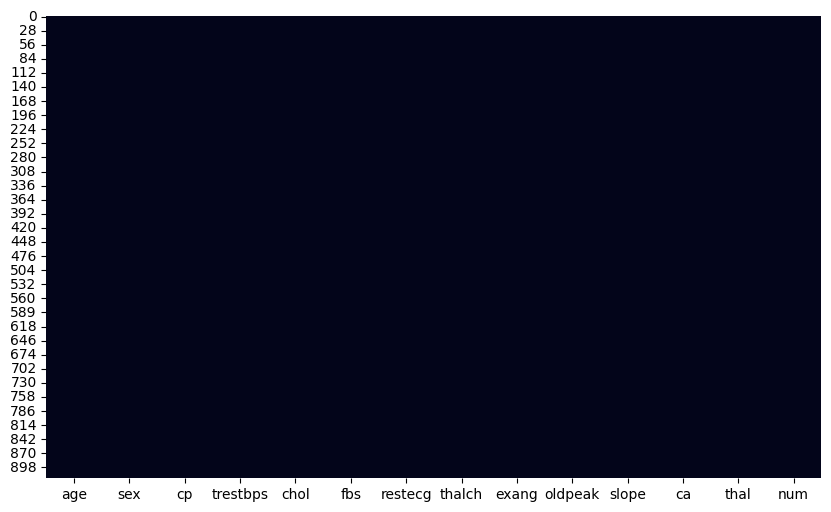

In [130]:
plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)

>* After applying the function all missing values imputed.

# <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Step 6 | Outliers</p>


### Deal with Outliers in the dataset


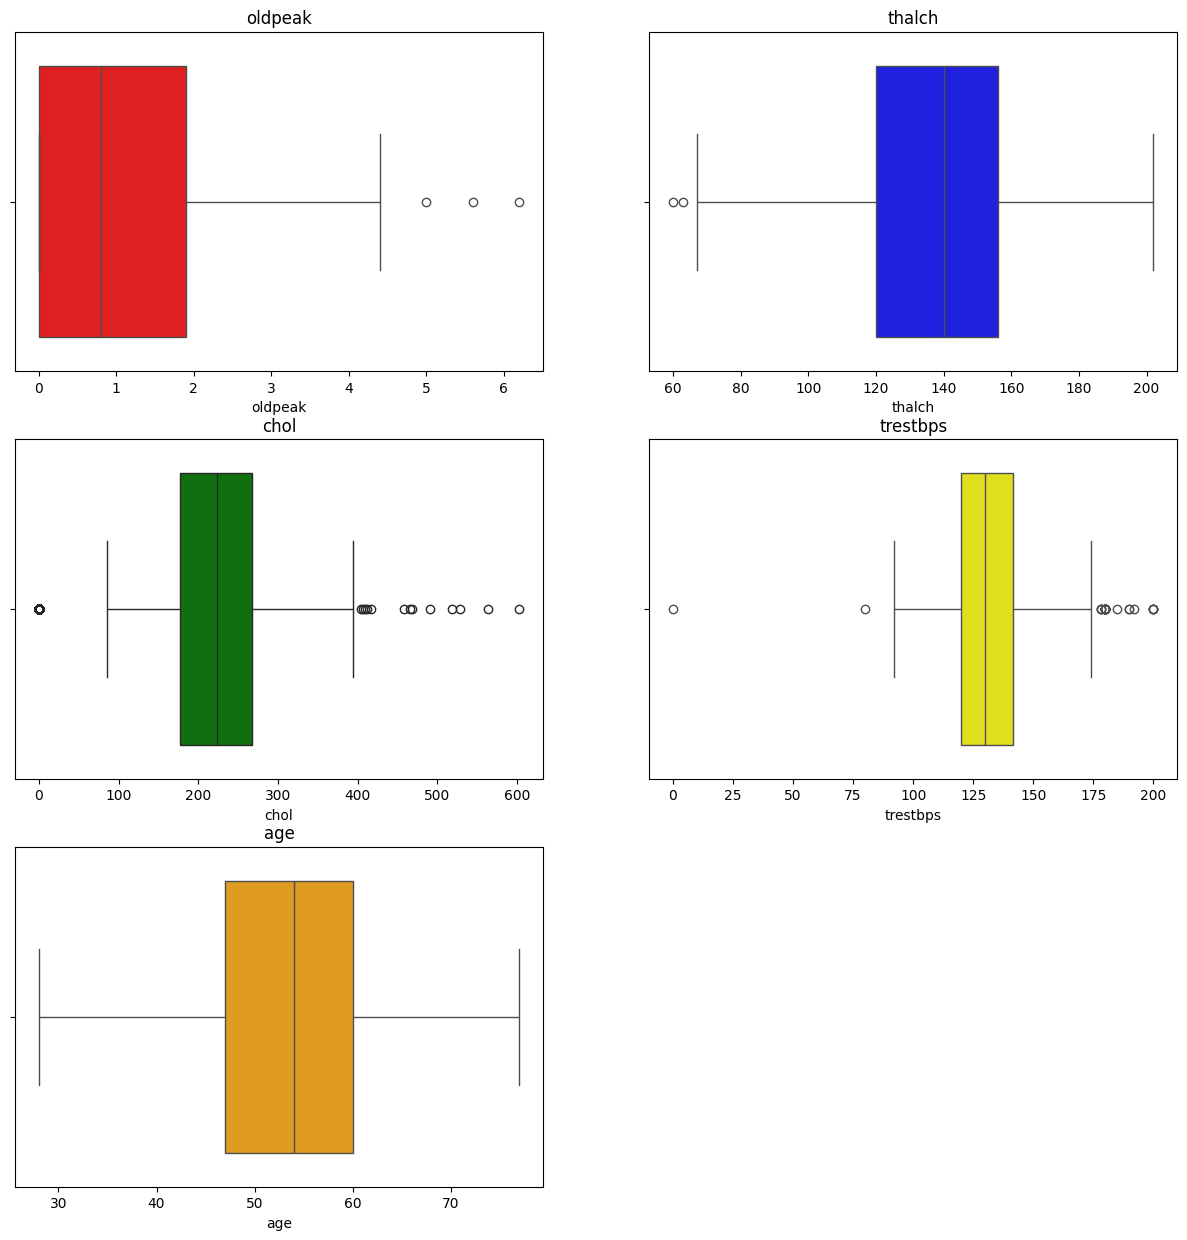

In [131]:
# Create box plots for all numeric columns using for loop and subplots
plt.figure(figsize=(15, 15))

colors = ['red', 'blue', 'green', 'yellow', 'orange']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)

plt.show()

In [132]:
# plot the outliers of age column using plotly
fig = px.box(df, y=numeric_cols, color_discrete_sequence=colors,
             title='Outliers of Age column')
fig.show()


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">6.2 | Check Outliers with IQR Method</p>


In [133]:

# check number outliers in numeric_cols using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

oldpeak       3
thalch        2
chol        184
trestbps     25
age           0
dtype: int64

## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">6.3 | Deal with Outliers</p>


> Deal with Outliers ***`trestbps`***
* ***`trestbps`*** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Resting Blood Pressure cannot be zero
> Deal with Outliers ***`oldpeak`***
* `oldpeak`: ST depression induced by exercise relative to rest
> Deal with Outliers ***`thalch`***
* `thalach`: maximum heart rate achieved
> Deal with Outliers ***`chol`***
* `chol` (serum cholesterol in mg/dl)


<span style="color: #FFBB00; font-size: 125%; font-weight: bold;">trestbps </span>

In [134]:
df['trestbps'].describe()

count    918.000000
mean     132.583007
std       18.599617
min        0.000000
25%      120.000000
50%      130.000000
75%      141.775000
max      200.000000
Name: trestbps, dtype: float64

In [135]:

# remove rows with values less than 80 in the 'trestbps' column
df = df[df['trestbps'] >= 80]



>* Blood Pressure cannot be `0` so this remove from the data
>* Graphical method show outlier but the these are not outliers because according to the data the blood pressure can be high
>* Greater than `120` the blood pressure is high and less than `80` is low


### <span style="color: #FFBB00; font-size: 200; font-weight: bold;">thalch </span>

>* In ***`thalch`*** column values can be start `71` so removed less than `71`


In [136]:
# remove rows with values less than 71 in the 'thalch' column
df = df[df['thalch'] >= 71]

In [137]:
df['thalch'].describe()

count    912.000000
mean     137.769331
std       24.867961
min       71.000000
25%      120.000000
50%      140.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64

### <span style="color: #FFBB00; font-size: 200; font-weight: bold;">Oldpeak </span>

>* In the `Oldpeak` column are `3` outliers

In [138]:

# remove outliers in 'oldpeak' column
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]


### <span style="color: #FFBB00; font-size: 200; font-weight: bold;">cholestrol </span>

>* There are some zero values in the column `cholestrol` so cholestrol can never be `0`
>* Here are `168` zero values in `chol` column

In [139]:
# print the row from df where chol value is 0
print("zero_counts :",(df['chol'] == 0).sum())
# remove this row from data
df = df[df['chol'] != 0]

zero_counts : 166


>* The values of chol cannot be zero
>* Count the cholestrol values between `126` to `400` other removed

In [140]:
# remove values less than 126
df = df[df['chol'] >= 126]
# remove values greater than 400
df = df[df['chol'] <= 400]

#### No Outliers in the in age column


# <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Step 7 | Machine Learning</p>


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">7.1 | Encoded the Data</p>


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       727 non-null    int64  
 1   sex       727 non-null    object 
 2   cp        727 non-null    object 
 3   trestbps  727 non-null    float64
 4   chol      727 non-null    float64
 5   fbs       727 non-null    object 
 6   restecg   727 non-null    object 
 7   thalch    727 non-null    float64
 8   exang     727 non-null    object 
 9   oldpeak   727 non-null    float64
 10  slope     727 non-null    object 
 11  ca        727 non-null    float64
 12  thal      727 non-null    object 
 13  num       727 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 85.2+ KB


>* Encode all categorical columns by ***`LabelEncoder`***

In [142]:
# Split the data set into X and Y
X = df.drop('num', axis=1)
y = df['num']

# apply labelencoder on categorical column
# Encode X data using separate Label encoder for all categorical columns and save it for inverse transformation
# List of categorical column names
categorical_columns = ['sex', 'cp',
                       'fbs', 'restecg', 'exang', 'slope', 'thal']

# Dictionary to store label encoders for each column
label_encoders = {}

# Loop through each column and apply label encoding
for column in categorical_columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform(X[column])
    label_encoders[column] = encoder

In [143]:
# Print out the mappings for each categorical column
for column, encoder in label_encoders.items():
    print(f"Mapping for column '{column}':")
    for index, label in enumerate(encoder.classes_):
        print(f"{label} -> {index}")


Mapping for column 'sex':
Female -> 0
Male -> 1
Mapping for column 'cp':
asymptomatic -> 0
atypical angina -> 1
non-anginal -> 2
typical angina -> 3
Mapping for column 'fbs':
False -> 0
True -> 1
Mapping for column 'restecg':
lv hypertrophy -> 0
normal -> 1
st-t abnormality -> 2
Mapping for column 'exang':
False -> 0
True -> 1
Mapping for column 'slope':
downsloping -> 0
flat -> 1
upsloping -> 2
Mapping for column 'thal':
fixed defect -> 0
normal -> 1
reversable defect -> 2


## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Machine Learning Model</p>

Exploring the dataset for the machine learning model.


In [144]:

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM


In [145]:

# import all models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Create a function to train and evaluate the models and select the best model</p>


In [146]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),

]
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.6792079207920791
Test Accuracy: 0.7214611872146118

Model: Gradient Boosting
Cross-validation Accuracy: 0.6771888953601243
Test Accuracy: 0.6712328767123288

Model: Support Vector Machine
Cross-validation Accuracy: 0.5196660842554844
Test Accuracy: 0.5525114155251142

Model: Logistic Regression
Cross-validation Accuracy: 0.6713065424189477
Test Accuracy: 0.6255707762557078

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5294505921180354
Test Accuracy: 0.54337899543379

Model: Decision Tree
Cross-validation Accuracy: 0.6221316249271986
Test Accuracy: 0.5616438356164384

Model: Ada Boost
Cross-validation Accuracy: 0.6397592700446515
Test Accuracy: 0.5981735159817352

Model: XG Boost
Cross-validation Accuracy: 0.6614832071442438
Test Accuracy: 0.6621004566210046

Model: Naive Bayes
Cross-validation Accuracy: 0.6378178994370025
Test Accuracy: 0.6438356164383562

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_st

In [147]:
def predict_heart_disease(model, input_data):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)
    return prediction

# Example input from user
user_input = {
    'age': 63,
    'sex': 1,
    'cp': 1,
    'trestbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalch': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 1,
    'ca': 0,
    'thal': 1
}

# Preprocess the user input and make prediction
prediction = predict_heart_disease(best_model, user_input)
print("Predicted class:", prediction)

Predicted class: [0]



## <a id="import"></a> <p style="background-color: #FCF6F5 ; font-family:Times New Roman; color:#FFBB00; font-size:150%; text-align:center; border-radius:0px 0px;">Save the best Model </p>


In [148]:
# Save best model using


# save the best model
import pickle
pickle.dump(best_model, open('Heart_prediction_model.pkl', 'wb'))